# Importing nitrogen measurement files

From the Umweltbundesamt data for all nitrogen measurement stations in Germany have been downloaded.
This data is contained in highly formatted Excel files. For further analysis within python the excel formatting as well as potential images need to be removed:

* transform xlsx files to csv

Further, due to formatting for human eyes data is not yet stored well for machine input. The following steps are taken to turn the semi-structured csv into a easily usable dataframe (pandas):

* read each csv file
* skip empty lines
* read in lines one by one
* remember 'bundesland' lines 
* add 'regular' lines as DF rows, add year and bundesland as additional columns
* turn individual rows into dataframe and merge dataframes for each file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
# adjust path for folder with no2 csv files
paths = glob.glob("*.csv")

In [3]:
dfs = []

# read in each file
for file in paths:
    
    # get year from filename
    year = file.split("_")[-1].split(".")[0]
  
    data = []
    ofile = open(file, "r")
    start = False
    bundesland = None
    linec = 0
    
    # parsing loop
    for line in ofile:
        linec+=1
        # check if 'content' of file has started
        if start == False:
            if line.lower().startswith("stat"):
                start = True
        else:    
            # check if a new 'bundesland' occurs
            if line.startswith("@"):
                bundesland = line.split("@")[1]
                if bundesland == "": continue
            else:
                # append bundesland and year to the start, then turn line into list
                data.append((bundesland + "@" + year +"@"+line.replace("\n", "")).split("@")[:8])
                
    ofile.close()
    
    # turn list of lists (rows) into pandas dataframe
    dfs.append(pd.DataFrame(data, columns= ["bundesland", "jahr", "station", "name", "umgebungstyp", "emissionstyp", "jahresmittel", "maxstundenwert"]))
    

Checking if reading worked as intended:

In [4]:
dfs[0].head()

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
0,Brandenburg,2002,'DEBB001',Burg (Spreewald),vorstädtisches Gebiet,Hintergrund,10,69
1,Brandenburg,2002,'DEBB006',Cottbus-Süd,städtisches Gebiet,Hintergrund,19,107
2,Brandenburg,2002,'DEBB009',Forst,vorstädtisches Gebiet,Hintergrund,16,83
3,Brandenburg,2002,'DEBB021',Potsdam-Zentrum,städtisches Gebiet,Hintergrund,21,111
4,Brandenburg,2002,'DEBB024',Senftenberg,städtisches Gebiet,Hintergrund,19,113
...,...,...,...,...,...,...,...,...
445,UBA,2002,'DEUB038',Aukrug,ländliches Gebiet,Hintergrund,13,65
446,UBA,2002,'DEUB039',Falkenberg,ländliches Gebiet,Hintergrund,9,57
447,UBA,2002,'DEUB040',Schorfheide,ländliches Gebiet,Hintergrund,8,69
448,UBA,2002,'DEUB041',Raisting,ländliches Gebiet,Hintergrund,9,69


In [5]:
dfs[16][dfs[16]["maxstundenwert"].str.contains("-")].head()

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
1,Baden-Württemberg,2018,DEBW219,Backnang Eugen-Adolff-Straße,städtisches Gebiet,Verkehr,49,--- 1)
3,Baden-Württemberg,2018,DEBW213,Balingen Schömberger Straße,vorstädtisches Gebiet,Verkehr,31,--- 1)
7,Baden-Württemberg,2018,DEBW220,Esslingen Grabbrunnenstraße,städtisches Gebiet,Verkehr,45,--- 1)
11,Baden-Württemberg,2018,DEBW226,Friedrichshafen Maybachstraße,städtisches Gebiet,Verkehr,39,--- 1)
14,Baden-Württemberg,2018,DEBW151,Heidelberg Mittermaierstraße,städtisches Gebiet,Verkehr,38,--- 1)
...,...,...,...,...,...,...,...,...
512,Thüringen,2018,DETH098,Gera Theaterstr. PS,städtisches Gebiet,Verkehr,32,--- 1)
516,Thüringen,2018,DETH075,Jena Westbahnhofstr.,städtisches Gebiet,Verkehr,29,--- 1)
518,Thüringen,2018,DETH100,Mühlhausen Petristeinweg,städtisches Gebiet,Verkehr,36,--- 1)
524,Thüringen,2018,DETH102,Suhl Dr.Th.-Neubauer-Str.,städtisches Gebiet,Verkehr,32,--- 1)


Some weird values in "maxstundenwert", however this column will not be used for analysis, so no need for cleaning.

In [6]:
len(dfs)

18

All files succesfully turned into pd.DataFrame.

Merging individual dataframes to a complete one, individual files identifyable via 'jahr' column.

In [7]:
stickstoff = pd.concat(dfs, ignore_index = True)

In [79]:
stickstoff.head()

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob
0,BRANDENBURG,2002,'DEBB001',BURG (SPREEWALD),vorstädtisches Gebiet,Hintergrund,10.0,69,vorstädtisch
1,BRANDENBURG,2002,'DEBB006',COTTBUS-SÜD,städtisches Gebiet,Hintergrund,19.0,107,städtisch
2,BRANDENBURG,2002,'DEBB009',FORST,vorstädtisches Gebiet,Hintergrund,16.0,83,vorstädtisch
3,BRANDENBURG,2002,'DEBB021',POTSDAM-ZENTRUM,städtisches Gebiet,Hintergrund,21.0,111,städtisch
4,BRANDENBURG,2002,'DEBB024',SENFTENBERG,städtisches Gebiet,Hintergrund,19.0,113,städtisch


* checking values of most interesting column 'jahresmittel'

In [9]:
stickstoff["jahresmittel"].unique()

array(['10', '19', '16', '21', '14', '12', '15', '20', '17', '13', '43',
       '46', '7', '27', '29', '54', '23', '18', '30', '35', '24', '55',
       '64', '49', '47', '41', '34', '25', '33', '32', '37', '38', '22',
       '28', '5', '26', '63', '8', '45', '44', '53', '75', '42', '40',
       '62', '52', '36', '56', '39', '48', '31', '11', '2', '66', '59',
       '58', '67', '65', '50', '60', '9', '4', '51', '61', '57', '80',
       '68', '3', '74', '72', '69', '6', '77', '70', '76', '92', '82',
       '78', '104', '121', '93', '71', '79', '98', '81', '106', '91',
       '85', '89', '88', '86', '112', '109', '73', '95', '100', '99',
       '84', '6,4', '4,3', '90', '97', '7,2', '8,6', '8,9', '8,8', '7,5',
       '7,8', '8,4', '5,7', '8,7', '8,5', '7,7', '6,3', '5,4', '4,7',
       '9,5', '7,6', '9,8', '5,8', '8,2', '8,1', '1,8', '4,6', '6,7',
       '6,6', '83', '87', '-999', '45 2)', '47 2)', '42 2)', '41 2)',
       '48 2)', '50 2)'], dtype=object)

* empty spaces and double numbers
* -999 outlier / false data?
* now removing empty space and nonsense number (e.g. 47 2)

In [10]:
def splitit(val):
    if " " in val:
        return val.split(" ")[0]
    else:
        return val
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].apply(splitit)

In [11]:
stickstoff[stickstoff["jahresmittel"]=="-999"]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
6246,Hessen,2015,DEHE131,Limburg-Schiede,städtisches Gebiet,Verkehr,-999,23


* replace , (comma) with . (dot) for easy type casting

In [12]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].str.replace(",",".")

* cast column to float

In [13]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].astype(float)

* drop row with extreme outlier -999

In [20]:
stickstoff.drop(6246, axis=0, inplace = True)

### Visualising data

* getting a quick overview of the data
* aggregate over years and plot mean jahresmittel values

In [21]:
mean = stickstoff.groupby("jahr").agg("mean")

Text(0, 0.5, 'Stickstoff-Wert')

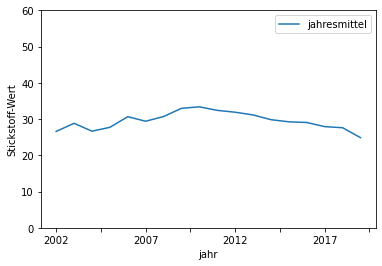

In [22]:
ax = mean.plot(ylim=(0,60))
ax.set_ylabel("Stickstoff-Wert")

* Check values one more time

In [23]:
stickstoff["jahresmittel"].sort_values(ascending=False).unique()

array([121. , 112. , 109. , 106. , 104. , 100. ,  99. ,  98. ,  97. ,
        95. ,  93. ,  92. ,  91. ,  90. ,  89. ,  88. ,  87. ,  86. ,
        85. ,  84. ,  83. ,  82. ,  81. ,  80. ,  79. ,  78. ,  77. ,
        76. ,  75. ,  74. ,  73. ,  72. ,  71. ,  70. ,  69. ,  68. ,
        67. ,  66. ,  65. ,  64. ,  63. ,  62. ,  61. ,  60. ,  59. ,
        58. ,  57. ,  56. ,  55. ,  54. ,  53. ,  52. ,  51. ,  50. ,
        49. ,  48. ,  47. ,  46. ,  45. ,  44. ,  43. ,  42. ,  41. ,
        40. ,  39. ,  38. ,  37. ,  36. ,  35. ,  34. ,  33. ,  32. ,
        31. ,  30. ,  29. ,  28. ,  27. ,  26. ,  25. ,  24. ,  23. ,
        22. ,  21. ,  20. ,  19. ,  18. ,  17. ,  16. ,  15. ,  14. ,
        13. ,  12. ,  11. ,  10. ,   9.8,   9.5,   9. ,   8.9,   8.8,
         8.7,   8.6,   8.5,   8.4,   8.2,   8.1,   8. ,   7.8,   7.7,
         7.6,   7.5,   7.2,   7. ,   6.7,   6.6,   6.4,   6.3,   6. ,
         5.8,   5.7,   5.4,   5. ,   4.7,   4.6,   4.3,   4. ,   3. ,
         2. ,   1.8]

### Cleaning 'umgebungstyp' column

* check individual values for umgebungstyp
* group multiple similar categories into one

In [25]:
stickstoff["umgebungstyp"].unique()

array(['vorstädtisches Gebiet', 'städtisches Gebiet', 'ländlich regional',
       'ländlich stadtnah', 'ländliches Gebiet', 'ländlich Hintergrund',
       'ländlich abgelegen', 'ländliches regional', 'ländlich reginal',
       'ländliches stadtnah', 'städtisches Gebiet '], dtype=object)

Clean column to use homogenous vocabulary: 
* ländlich vs ländliches 
* fixing errors like 'reginal'
* stripping unnecessary space characters

In [26]:
stickstoff["umgebungstyp"] = stickstoff["umgebungstyp"].str.strip(" ").str.replace("reginal","regional").str.replace("ländliches","ländlich")

Group up similar values into the same category:

In [27]:
def group_up(val):
    if "länd" in val:
        return "ländlich"
    elif "vorst" in val:
        return "vorstädtisch"
    else:
        return "städtisch"

In [28]:
stickstoff["umgebungstyp_grob"] = stickstoff["umgebungstyp"].apply(group_up)

In [29]:
stickstoff["umgebungstyp_grob"].unique()

array(['vorstädtisch', 'städtisch', 'ländlich'], dtype=object)

* new column "umgebungstyp_grob" 
* easier to work with, still contains most important information

#### Visualising the nitrogen values for different environmental values

* now aggregate mean nitrogen values over the years for individual categories
* städtisch, vorstädtisch, ländlich

In [30]:
mean = stickstoff.groupby(["jahr", "umgebungstyp_grob"]).agg("mean")

In [31]:
mean_st = stickstoff[stickstoff["umgebungstyp_grob"] == "städtisch"].groupby("jahr").agg("mean")

In [32]:
mean_vs = stickstoff[stickstoff["umgebungstyp_grob"] == "vorstädtisch"].groupby("jahr").agg("mean")

In [33]:
mean_la = stickstoff[stickstoff["umgebungstyp_grob"] == "ländlich"].groupby("jahr").agg("mean")

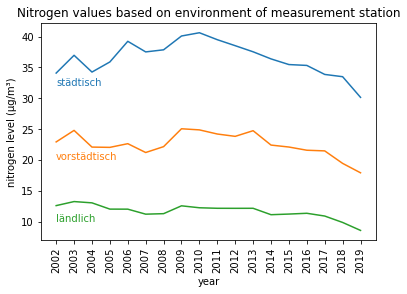

In [64]:
plt.plot(mean_st)
plt.plot(mean_vs)
plt.plot(mean_la)
plt.title("Nitrogen values based on environment of measurement station")
plt.xlabel("year")
plt.ylabel("nitrogen level (µg/m³)")
plt.xticks(rotation="vertical")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.text(0,32,"städtisch", color=colors[0])
plt.text(0,20,"vorstädtisch", color=colors[1])
plt.text(0,10,"ländlich", color=colors[2])

As expected, "städtisch" has the highest values followed by "vorstädtisch" and with "ländlich" having the lowest

### Cleaning of 'bundesland' column

To merge this dataframe with other data, the bundesland column needs to be uniform
* first check the unique values

In [66]:
stickstoff["bundesland"].unique()

array(['Brandenburg', 'Berlin', 'Baden-Württemberg', 'Bayern', 'Bremen',
       'Hessen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrrhein-Westfalen', 'Rheinland-Pfalz', 'Schleswig-Holstein',
       'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'UBA',
       'Nordrhein-Westfalen', 'Umweltbundesamt'], dtype=object)

* check umweltbundesamt

In [67]:
stickstoff[stickstoff["bundesland"] == "UBA"].shape

(78, 9)

In [68]:
stickstoff[stickstoff["bundesland"] == "Umweltbundesamt"].shape

(79, 9)

* Replace 'Ü' with 'UE' in Bundesland, to conform it to other dataset
* turn to uppercase

In [69]:
stickstoff["bundesland"] = stickstoff["bundesland"].str.upper().str.replace("Ü", "UE")

In [70]:
stickstoff["bundesland"].unique()

array(['BRANDENBURG', 'BERLIN', 'BADEN-WUERTTEMBERG', 'BAYERN', 'BREMEN',
       'HESSEN', 'HAMBURG', 'MECKLENBURG-VORPOMMERN', 'NIEDERSACHSEN',
       'NORDRRHEIN-WESTFALEN', 'RHEINLAND-PFALZ', 'SCHLESWIG-HOLSTEIN',
       'SAARLAND', 'SACHSEN', 'SACHSEN-ANHALT', 'THUERINGEN', 'UBA',
       'NORDRHEIN-WESTFALEN', 'UMWELTBUNDESAMT'], dtype=object)

* see if bundesländer are the same

In [73]:
# tester is directly copied from the other data import 
tester = "BADEN-WUERTTEMBERG,BAYERN,BERLIN,BRANDENBURG,BREMEN,HAMBURG,HESSEN,MECKLENBURG-VORPOMMERN,NIEDERSACHSEN,NORDRHEIN-WESTFALEN,RHEINLAND-PFALZ,SAARLAND,SACHSEN,SACHSEN-ANHALT,SCHLESWIG-HOLSTEIN,THUERINGEN"

In [74]:
for land in stickstoff["bundesland"].unique():
    if land not in tester.split(","):
        print(land)

NORDRRHEIN-WESTFALEN
UBA
UMWELTBUNDESAMT


* UBA and Umweltbundesamt not present in other data --> will get lost in merge
* typo in nordrhein-westfalen, correcting:

In [75]:
stickstoff["bundesland"] = stickstoff["bundesland"].str.replace("NORDRRHEIN", "NORDRHEIN")

Names are usually (but not always) the Street name the station location. This may be used for further merging and identification of exact locations of nitrogen values.

* translate to 'better' names for matching with other dataset
* turn to uppercase
* replace 'Umlaute'

In [76]:
def translate(val):
    val1 = val.replace("Ä","AE").replace("Ö", "OE").replace("Ü", "UE")
    val1 = val1.upper()
    return val1

stickstoff["name"] = stickstoff["name"].apply(translate)

In [77]:
stickstoff["name"]

0       BURG (SPREEWALD)
1            COTTBUS-SÜD
2                  FORST
3        POTSDAM-ZENTRUM
4           SENFTENBERG 
              ...       
8681        SCHAUINSLAND
8682            SCHMÜCKE
8683             WALDHOF
8684          WESTERLAND
8685              ZINGST
Name: name, Length: 8684, dtype: object

#### Save data

* for easier import the Dataframe will be saved as pkl (pickle) file

In [78]:
stickstoff.to_pickle("stickstoff_daten.pkl")